In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

# Read Data

In [3]:
# TODO: read data.csv into a dataframe (~1 line)
df1 = pd.read_csv('HW2.csv',header = None)
## END OF TODO

df1.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [4]:
df1.shape
# Expected output: (1040,29)

(1040, 29)

In [5]:
df1.columns = ['id', 'Jitter (local)', 'Jitter (local/absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local/dB)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'UPDRS', 'Class']
df1

,id,Jitter (local),Jitter (local/absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local/dB),Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,Class
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
5,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1
6,1,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,...,200.638,85,84,0.005199,0.000245,4.348,0,0.000,23,1
7,1,1.920,0.000099,0.926,1.031,2.777,10.184,1.108,3.650,4.611,...,201.921,71,70,0.005137,0.000215,33.929,0,0.000,23,1
8,1,2.257,0.000119,1.239,1.530,3.716,8.044,0.877,3.449,4.239,...,210.523,107,104,0.005282,0.000348,15.152,2,9.810,23,1
9,1,1.594,0.000085,0.850,0.951,2.550,7.200,0.823,2.480,3.826,...,203.133,113,112,0.005335,0.000332,0.000,0,0.000,23,1


In [6]:
del df1['id'] # remove subject ID column

In [7]:
df1.describe()

,Jitter (local),Jitter (local/absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local/dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,Class
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,2.679523,0.000170,1.247053,1.348327,3.741161,12.918391,1.194895,5.699600,7.983552,12.215345,...,234.875990,109.744231,105.969231,0.006547,0.000843,27.682856,1.134615,12.370042,13.000000,0.500000
std,1.765053,0.000106,0.979462,1.138742,2.938443,5.452204,0.420071,3.015183,4.840892,6.016261,...,121.541243,150.027703,149.417074,0.001875,0.000723,20.975294,1.614764,15.161916,15.894745,0.500241
min,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,0.517000,...,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.507500,0.000095,0.617000,0.665750,1.851750,9.353500,0.941000,3.703000,5.160250,8.079500,...,143.650750,42.750000,40.750000,0.005039,0.000404,8.149250,0.000000,0.000000,1.000000,0.000000
50%,2.396000,0.000151,1.035500,1.126500,3.107000,12.348500,1.181500,5.134500,7.050500,11.418659,...,195.971000,65.000000,62.000000,0.006484,0.000644,26.501000,1.000000,5.826000,3.000000,0.500000
75%,3.411500,0.000229,1.602500,1.694750,4.808500,15.493250,1.411000,6.942000,9.558930,15.306125,...,263.798250,113.000000,109.000000,0.007923,0.000980,43.064250,1.000000,22.255500,23.250000,1.000000
max,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,44.764000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,55.000000,1.000000


# Split Data into Training and Testing

In [8]:
# TODO: extract features and labels (~3 lines)
# Use the last column as label Y. 
# The next to the last column UPDRS (Unified Parkinson's Disease Rating Scale)
# can be used in the bonus (optional) problem for regression. 
# Use the rest columns (other than the last two columns) as features X

df = pd.read_csv('HW2.csv',header = None)
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 1:26].values
y = df.loc[:, 28].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_


# END OF TODO 

array([0, 1], dtype=int64)

In [9]:
# TODO: hold out 20% for testing using stratified sampling (~1 line)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

                     
# END OF TODO 

In [10]:
nfolds = 10

In [11]:
X.shape # Expected outcome: (1040,26)

(1040, 26)

In [12]:
y.shape # Expected outcome: (1040,0)

(1040,)

## K-Nearest Neighbors (KNN)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(X_train,y_train)
y_predict = clf_knn.predict(X_test)
y_predict
clf_knn.score(X_test,y_test)

0.6634615384615384

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [18]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[69 35]
 [26 78]]
             precision    recall  f1-score   support

          0       0.73      0.66      0.69       104
          1       0.69      0.75      0.72       104

avg / total       0.71      0.71      0.71       208



In [30]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

# TODO: set parameter k as odd numbers from 1 to 13 (~1 line)
param_range = [1, 3, 5, 7, 9, 11, 13]
# END OF TODO 

param_grid = [{'knn__n_neighbors': param_range}]

# TODO: Using GridSearchCV to find the optimal k. setup n_jobs=-1 to use all CPUs (~1 line)



gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)


# TODO: Fit the KNN grid search model to training data (~1 line)
gs = gs.fit(X_train, y_train)
# END OF TODO

print(gs.best_score_)
print(gs.best_params_)

0.6703834416627473
{'knn__n_neighbors': 3}


In [31]:
clf_knn = gs.best_estimator_
clf_knn.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf_knn.score(X_test, y_test))

Test accuracy: 0.649


## Support Vector Machines (SVM)

In [32]:
# TODO: Build a pipeline including a standard scaler and SVC classifier (~1 line)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
# END OF TODO

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# TODO: Use GridSearchCV to find optimal kernel (linear or rbf), C (param_range), and/or gamma (param_range) (~3 lines)

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)



# END OF TODO

print(gs.best_score_)
print(gs.best_params_)

0.6802884615384616
{'svc__C': 10.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [33]:
clf_svm = gs.best_estimator_
clf_svm.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf_svm.score(X_test, y_test))

Test accuracy: 0.731


## Naive Bayes (NB)

In [34]:
# TODO: Build a Naive Bayes classifier (no hyper-parameters) (~2 lines)

from collections import Counter, defaultdict
import numpy as np


class NBayes:
    def __init__(self, lambda_=1):
        self.lambda_ = lambda_  
        self.p_prior = {}  
        self.p_condition = {}  

    def fit(self, X_data, y_data):
        N = y_data.shape[0]
        c_y = Counter(y_data)
        K = len(c_y)
        for key, val in c_y.items():
            self.p_prior[key] = (val + self.lambda_) / (N + K * self.lambda_)
        for d in range(X_data.shape[1]):  
            Xd_y = defaultdict(int)
            vector = X_data[:, d]
            Sd = len(np.unique(vector))
            for xd, y in zip(vector, y_data): 
                Xd_y[(xd, y)] += 1
            for key, val in Xd_y.items():
                self.p_condition[(d, key[0], key[1])] = (val + self.lambda_) / (c_y[key[1]] + Sd * self.lambda_)
        return

    def predict(self, X):
        p_post = defaultdict()
        for y, py in self.p_prior.items():
            p_joint = py  
            for d, Xd in enumerate(X):
                p_joint *= self.p_condition[(d, Xd, y)]  
            p_post[y] = p_joint  
        return max(p_post, key=p_post.get)


if __name__ == '__main__':
    data = df
    X_data =df.iloc[:,0:26].values
    y_data =df.iloc[:,28].values
    clf_NB = NBayes(lambda_=1)
    clf_NB.fit(X_data, y_data)
    print(clf_NB.p_prior, '\n', clf_NB.p_condition)
   
# END OF TODO

{1: 0.5, 0: 0.5} 
 {(0, 1.0, 1): 0.048214285714285716, (0, 2.0, 1): 0.048214285714285716, (0, 3.0, 1): 0.048214285714285716, (0, 4.0, 1): 0.048214285714285716, (0, 5.0, 1): 0.048214285714285716, (0, 6.0, 1): 0.048214285714285716, (0, 7.0, 1): 0.048214285714285716, (0, 8.0, 1): 0.048214285714285716, (0, 9.0, 1): 0.048214285714285716, (0, 10.0, 1): 0.048214285714285716, (0, 11.0, 1): 0.048214285714285716, (0, 12.0, 1): 0.048214285714285716, (0, 13.0, 1): 0.048214285714285716, (0, 14.0, 1): 0.048214285714285716, (0, 15.0, 1): 0.048214285714285716, (0, 16.0, 1): 0.048214285714285716, (0, 17.0, 1): 0.048214285714285716, (0, 18.0, 1): 0.048214285714285716, (0, 19.0, 1): 0.048214285714285716, (0, 20.0, 1): 0.048214285714285716, (0, 21.0, 0): 0.048214285714285716, (0, 22.0, 0): 0.048214285714285716, (0, 23.0, 0): 0.048214285714285716, (0, 24.0, 0): 0.048214285714285716, (0, 25.0, 0): 0.048214285714285716, (0, 26.0, 0): 0.048214285714285716, (0, 27.0, 0): 0.048214285714285716, (0, 28.0, 0): 0.0

In [35]:
print(clf_NB.score(X_test,y_test))

AttributeError: 'NBayes' object has no attribute 'score'

## Neural Networks (NN)

In [36]:
# TODO: Use MLPClassifier to build a neural network.(~2 lines)
# Try different hyper-parameters of # of layers and # of nodes in each layer
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np

clf_nn = MLPClassifier(hidden_layer_sizes=[2],
                                     activation='logistic',
                                     random_state=3)
clf_nn.fit(X_train, y_train)


# END OF TODO

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[2], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [37]:
print(clf_nn.score(X_test,y_test))

0.6586538461538461


## Decision Tree

In [38]:
## TODO: Use tree.DecisionTreeClassifier to build a decision tree using training data (~2 lines)

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))
clf_dt.fit(X_train, y_train)
## END OF TODO
print(clf_dt.score(X_test,y_test))

CV accuracy: 0.663 +/- 0.043
0.6586538461538461


## Visualize the tree

In [40]:
import graphviz as gv
dot_data = tree.export_graphviz(clf_dt, out_file=None) 
graph = gv.Source(dot_data) 
graph.render("Parkinson Decision Tree")
feature_names = list(df.iloc[:, 0:-2].head())

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                                feature_names=feature_names,
                                class_names=['HC','PD'],
                                filled=True,
                                rounded=True)  
graph = gv.Source(dot_data)
graph

# Learning Curve

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
estimator = gs_knn.best_estimator_
plot_learning_curve(estimator, title, X_train, Y_train, ylim=(0.4, 1.02), cv=cv, n_jobs=-1)
plt.show()

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [39]:
## TODO: Plot the learning and cross-validaiton curves for SVM (~4 lines)

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


clf_svm = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf_svm,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 0.8])
plt.tight_layout()
plt.show()


# END OF TODO

NameError: name 'LogisticRegression' is not defined

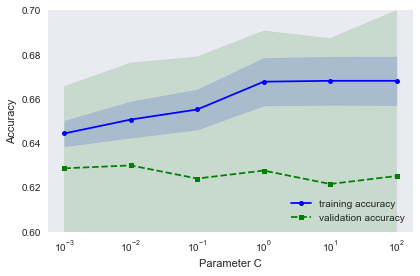

In [287]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=clf_svm, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.7])
plt.tight_layout()
plt.show()

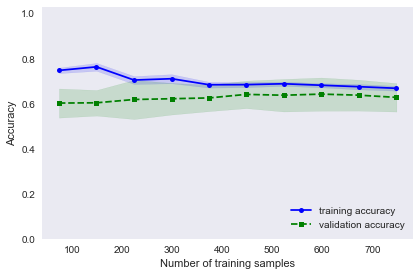

In [291]:
## TODO: Plot the learning and cross-validaiton curves for Naive Bayes (~4 lines)

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


clf_NB = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf_NB,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1.03])
plt.tight_layout()
plt.show()


# END OF TODO

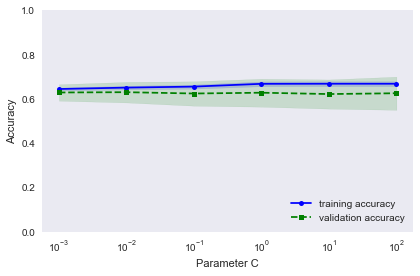

In [292]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=clf_NB, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

In [1]:
## TODO: Plot the learning and cross-validaiton curves for Neural Networks (~4 lines)

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


clf_nn = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf_nn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()


# END OF TODO

NameError: name 'make_pipeline' is not defined

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=clf_nn, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
## TODO: Plot the learning and cross-validaiton curves for Decision Tree (~4 lines)

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


clf_dt = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf_dt,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()


# END OF TODO

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=clf_dt, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

# BONUS (OPTIONAL): Regression

In [ ]:
# TODO: Use XGBoost Regression or Support Vector Regression to train a regression model to predict UPDRS (bonus: 5 points)



# END OF TODO